In [43]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sn
import matplotlib.pyplot as plt
from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [44]:
df_BTC = pd.read_csv('final_BTCUSDT.csv')

In [45]:
df_BTC.head()

open_time            close_time      open      high       low  \
0  12/31/2021, 23:00:00  12/31/2021, 23:59:59  46303.98  46520.13  46132.04   
1  12/31/2021, 22:00:00  12/31/2021, 22:59:59  46333.87  46569.97  46232.36   
2  12/31/2021, 21:00:00  12/31/2021, 21:59:59  45886.66  46513.67  45766.85   
3  12/31/2021, 20:00:00  12/31/2021, 20:59:59  45728.28  46211.07  45678.00   
4  12/31/2021, 19:00:00  12/31/2021, 19:59:59  46686.42  46688.68  45678.96   

      close      volume  quote_asset_volume  num_trades  \
0  46216.93   985.99762        4.571976e+07       29555   
1  46303.99   991.85142        4.600406e+07       36280   
2  46333.86  1734.69585        7.997065e+07       54579   
3  45879.24  1831.41202        8.422142e+07       51300   
4  45728.28  3851.30902        1.776171e+08       87472   

   taker_buy_base_asset_volume  taker_buy_quote_asset_volume  ignore  \
0                    484.09229                  2.244919e+07       0   
1                    447.96605                  2.077702e+07       0   
2                    972.44065                  4.482430e+07       0   
3                    997.72369                  4.588270e+07       0   
4                   1691.64542                  7.803749e+07       0   

   open_timestamp  close_timestamp symbol currency  
0   1640991600000    1640995199999    BTC     USDT  
1   1640988000000    1640991599999    BTC     USDT  
2   1640984400000    1640987999999    BTC     USDT  
3   1640980800000    1640984399999    BTC     USDT  
4   1640977200000    1640980799999    BTC     USDT

In [46]:
df_BTC['open_time']

0        12/31/2021, 23:00:00
1        12/31/2021, 22:00:00
2        12/31/2021, 21:00:00
3        12/31/2021, 20:00:00
4        12/31/2021, 19:00:00
                 ...         
21269    01/01/2023, 04:00:00
21270    01/01/2023, 03:00:00
21271    01/01/2023, 02:00:00
21272    01/01/2023, 01:00:00
21273    01/01/2023, 00:00:00
Name: open_time, Length: 21274, dtype: object

In [47]:
df_BTC['datetime'] = df_BTC['open_time'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y, %H:%M:%S"))

In [48]:
df_BTC['year'] = df_BTC['datetime'].apply(lambda x: x.year)
df_BTC['month'] = df_BTC['datetime'].apply(lambda x: x.month)
df_BTC['day'] = df_BTC['datetime'].apply(lambda x: x.day)
df_BTC['day_of_week'] = df_BTC['datetime'].apply(lambda x: x.weekday())

In [50]:
df_BTC['hour'] = df_BTC['datetime'].apply(lambda x: x.hour)

In [51]:
df_BTC.head()

open_time            close_time      open      high       low  \
0  12/31/2021, 23:00:00  12/31/2021, 23:59:59  46303.98  46520.13  46132.04   
1  12/31/2021, 22:00:00  12/31/2021, 22:59:59  46333.87  46569.97  46232.36   
2  12/31/2021, 21:00:00  12/31/2021, 21:59:59  45886.66  46513.67  45766.85   
3  12/31/2021, 20:00:00  12/31/2021, 20:59:59  45728.28  46211.07  45678.00   
4  12/31/2021, 19:00:00  12/31/2021, 19:59:59  46686.42  46688.68  45678.96   

      close      volume  quote_asset_volume  num_trades  \
0  46216.93   985.99762        4.571976e+07       29555   
1  46303.99   991.85142        4.600406e+07       36280   
2  46333.86  1734.69585        7.997065e+07       54579   
3  45879.24  1831.41202        8.422142e+07       51300   
4  45728.28  3851.30902        1.776171e+08       87472   

   taker_buy_base_asset_volume  ...  open_timestamp  close_timestamp  symbol  \
0                    484.09229  ...   1640991600000    1640995199999     BTC   
1                    447.96605  ...   1640988000000    1640991599999     BTC   
2                    972.44065  ...   1640984400000    1640987999999     BTC   
3                    997.72369  ...   1640980800000    1640984399999     BTC   
4                   1691.64542  ...   1640977200000    1640980799999     BTC   

   currency            datetime  year month  day  day_of_week  hour  
0      USDT 2021-12-31 23:00:00  2021    12   31            4    23  
1      USDT 2021-12-31 22:00:00  2021    12   31            4    22  
2      USDT 2021-12-31 21:00:00  2021    12   31            4    21  
3      USDT 2021-12-31 20:00:00  2021    12   31            4    20  
4      USDT 2021-12-31 19:00:00  2021    12   31            4    19  

[5 rows x 22 columns]

In [55]:
df_BTC = df_BTC[df_BTC['hour']==0]

In [56]:
df_BTC.dtypes

open_time                               object
close_time                              object
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
quote_asset_volume                     float64
num_trades                               int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
ignore                                   int64
open_timestamp                           int64
close_timestamp                          int64
symbol                                  object
currency                                object
datetime                        datetime64[ns]
year                                     int64
month                                    int64
day                                      int64
day_of_week                              int64
hour         

In [57]:
df_BTC = df_BTC.sort_values('datetime', ascending = True)

In [58]:
df_BTC = df_BTC.sort_values('datetime')
df_BTC.shape


(887, 22)

In [59]:
sd=df_BTC.iloc[0][0]
ed=df_BTC.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 01/01/2021, 00:00:00
Ending Date 06/06/2023, 00:00:00


In [60]:
df_BTC.dtypes

open_time                               object
close_time                              object
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
quote_asset_volume                     float64
num_trades                               int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
ignore                                   int64
open_timestamp                           int64
close_timestamp                          int64
symbol                                  object
currency                                object
datetime                        datetime64[ns]
year                                     int64
month                                    int64
day                                      int64
day_of_week                              int64
hour         

### Viz

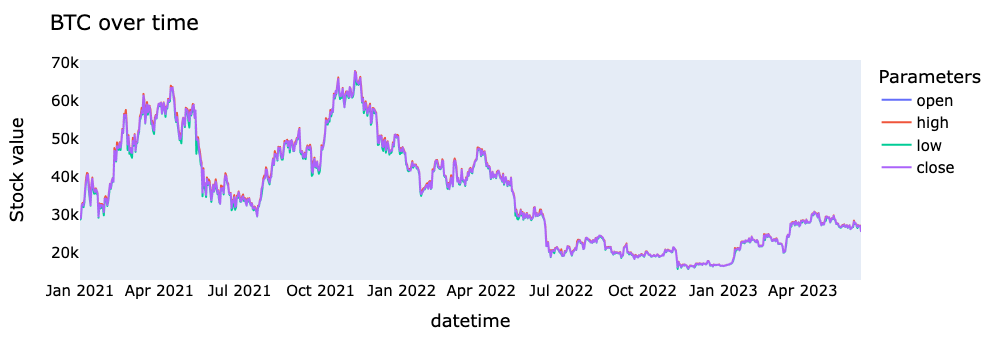

In [61]:
names = cycle(['open','high','low','close'])

fig = px.line(df_BTC, x=df_BTC.datetime, y=[df_BTC['open'], df_BTC['high'], 
                                          df_BTC['low'], df_BTC['close']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='BTC over time', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [62]:
### We take train on data until 12am, 2023-05-29 to forecast a week afterward.

close_df = df_BTC[df_BTC.datetime > datetime.datetime(2021,5,1,0,0)][['datetime','close']]
close_df = close_df[close_df.datetime <= datetime.datetime(2023,5,29,0,0)][['datetime','close']]

# close_df = close_df.rename(columns={'datetime':'date'})

close_df.shape



(758, 2)

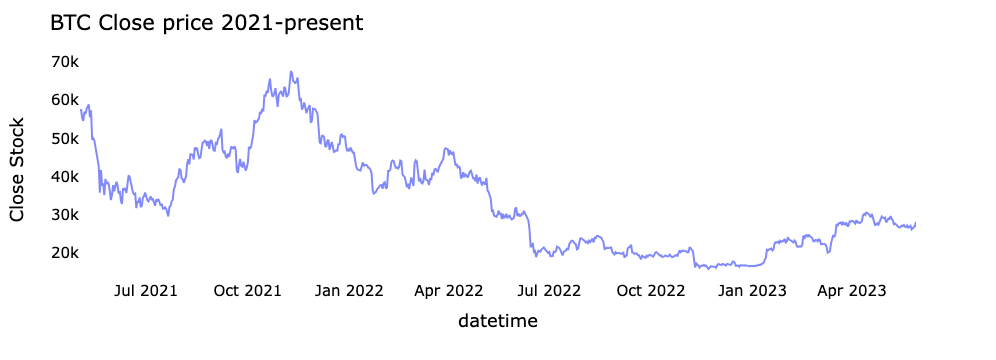

In [63]:
fig = px.line(close_df, x=close_df.datetime, y=close_df.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='BTC Close price 2021-present', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [64]:
from sklearn.preprocessing import MinMaxScaler

del close_df['datetime']
scaler=MinMaxScaler(feature_range=(0,1))
close_df=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(close_df.shape)

(758, 1)


In [65]:
# Train/Test Split
# Change train/test split size for testing. Default = 0.65

training_size=int(len(close_df)*0.7)
test_size=len(close_df)-training_size
train_data,test_data=close_df[0:training_size,:],close_df[training_size:len(close_df),:1]


print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (530, 1)
test_data:  (228, 1)


In [66]:

# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)



In [67]:
### Change the time_step to 12, 36, 48 etc. to see if this makes a difference
time_step = 12
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (517, 12)
y_train:  (517,)
X_test:  (215, 12)
y_test (215,)


In [68]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)



X_train:  (517, 12, 1)
X_test:  (215, 12, 1)


### LSTM

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

# model=Sequential()

# model.add(LSTM(50,input_shape=(None,1),activation="relu",return_sequences=True))
# model.add(Dropout(0.1))
# model.add(LSTM(20))
# model.add(Dense(1))
# model.compile(loss="mean_squared_error",optimizer="adam")
# model.summary()

# es = EarlyStopping(patience=10, verbose=1, min_delta=0.01, monitor='loss', mode='auto', 
#                    restore_best_weights=True)


model=Sequential()

model.add(LSTM(20,input_shape=(None,1),activation="relu")) ### play around with this etc.
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

es = EarlyStopping(patience=20, verbose=2, min_delta=0.005, monitor='loss', mode='auto', 
                   restore_best_weights=True)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [70]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1,callbacks = [es])


Epoch 1/100
17/17 [==============================] - 2s 23ms/step - loss: 0.2124 - val_loss: 0.0121
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 0.1302 - val_loss: 0.0049
Epoch 3/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0555 - val_loss: 0.0068
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0088 - val_loss: 0.0085
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 8/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 9/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 10/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 11

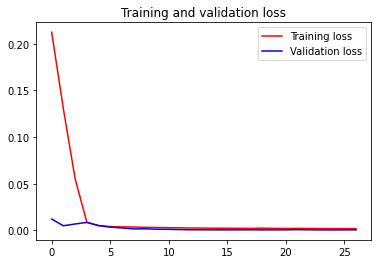

<Figure size 432x288 with 0 Axes>

In [71]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [72]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((517, 1), (215, 1))

In [73]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 


In [74]:
import math
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))

print("-------------------------------------------------------------------------------------")

print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  3096.0825391002254
Train data MSE:  9585727.0889213
Train data MAE:  2445.1463805609283
-------------------------------------------------------------------------------------
Test data RMSE:  2592.6692351666998
Test data MSE:  6721933.762979881
Test data MAE:  2138.5134313226745


In [75]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9373771591797035
Test data R2 score: 0.685052711167395


In [76]:
close_stock =  df_BTC[df_BTC.datetime > datetime.datetime(2021,5,1,0,0)][['datetime','close']]
close_stock =  close_stock[close_stock.datetime <= datetime.datetime(2023,5,29,0,0)][['datetime','close']]

Train predicted data:  (758, 1)
Test predicted data:  (758, 1)


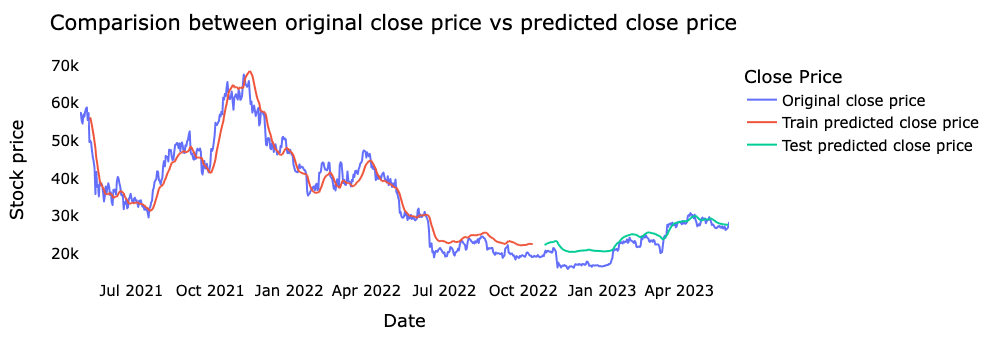

In [77]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_df)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['datetime'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



In [34]:

x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_hours = 168
#7 days

while(i<pred_hours):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
           
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next 7 days (168 hours): ", len(lst_output))

Output of predicted next 7 days (168 hours):  168


In [35]:
from pandas.tseries.offsets import *
add_dates = [(close_stock['datetime'].iloc[-1] + pd.tseries.offsets.Hour(n = x)) for x in range(0,pred_hours+1)]
future_dates = pd.DataFrame(index = add_dates[1:])
forecast = np.array(lst_output).reshape(-1,1).tolist()

df_predict = pd.DataFrame((scaler.inverse_transform(forecast).reshape(1,-1).tolist()[0]), index = future_dates.index, columns=['Predict Close'])

close_stock = close_stock.set_index('datetime')


close_stock.shape, df_predict.shape

((18185, 1), (168, 1))

In [36]:
#merging actuals + predictions
df_proj = pd.concat([close_stock,df_predict],axis=0)

df_proj.shape

(18353, 2)

In [37]:
df_proj.iloc[-169]['Predict Close'] = df_proj.iloc[[-169]]['close']

In [38]:
close_stock_full = df_BTC[df_BTC.datetime > datetime.datetime(2021,5,1,0,0)][['datetime','close']]
close_stock_full = close_stock_full[close_stock_full.datetime <= datetime.datetime(2023,6,5,0,0)]

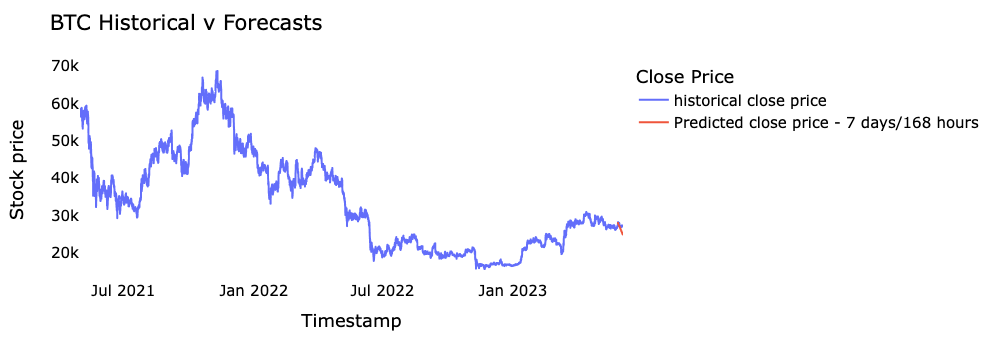

In [39]:
names = cycle(['historical close price','Predicted close price - 7 days/168 hours'])

fig = px.line(df_proj,x=df_proj.index, y=[close_stock_full['close'],df_proj['Predict Close']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='BTC Historical v Forecasts',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



In [40]:
### TODO do above for after the 29th etc.

In [41]:
df_proj_rest = df_proj.reset_index()[df_proj.reset_index()['index'] > datetime.datetime(2023,5,20,0)]

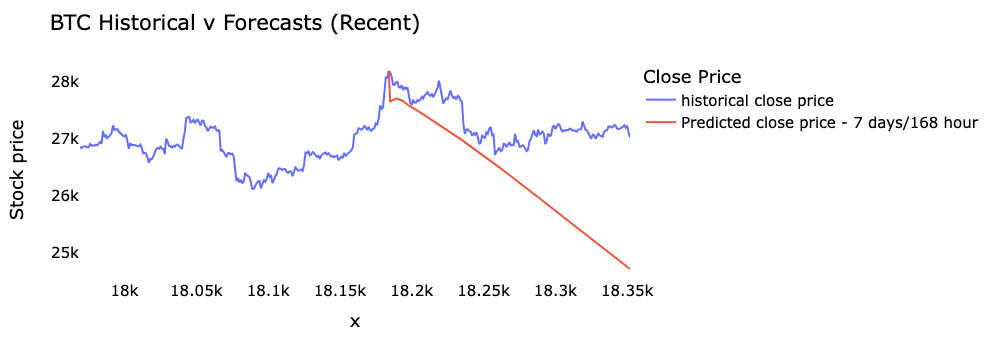

In [42]:
names = cycle(['historical close price','Predicted close price - 7 days/168 hour'])

fig = px.line(df_proj,x=df_proj_rest.index, y=[close_stock_full[close_stock_full.datetime > datetime.datetime(2023,5,20,0)]['close'],df_proj_rest['Predict Close']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='BTC Historical v Forecasts (Recent)',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)